Requires
- nltk
- PIL Image
- torch, torchvision
- sklearn
- pycocotools
- requests
- tqdm

In [2]:
import sys
sys.path.insert(0, '/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/nearest-neighbor')
from feature_extraction import ImageFeature

In [8]:
from PIL import Image
import requests
import numpy as np
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from pycocotools.coco import COCO

In [4]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)

In [5]:
annFile

'../annotations/annotations_trainval2014/annotations/captions_val2014.json'

In [6]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


In [11]:
img_feats = np.empty((len(coco.imgs), 512))
img_map = {}
idx = 0
for img_id, info in tqdm(coco.imgs.items()):
    url = info['coco_url']
    img_feat = ImageFeature(url).get_vector()
    img_feats[idx] = img_feat.numpy()
    img_map[idx] = img_id
    idx += 1
    if idx == 50:
        break

  0%|          | 49/40504 [00:22<5:10:49,  2.17it/s]


In [12]:
img_feats

array([[8.18631530e-01, 1.33521366e+00, 4.34643149e-01, ...,
        5.35858452e-01, 6.16340756e-01, 1.13733077e+00],
       [6.20557904e-01, 1.32516038e+00, 9.95547950e-01, ...,
        1.71793431e-01, 2.67287642e-01, 6.97274983e-01],
       [9.50365186e-01, 4.90617752e-01, 1.73506618e-01, ...,
        4.10809726e-01, 3.01642209e-01, 3.01986337e-01],
       ...,
       [7.81948924e-01, 2.44786832e-02, 1.63077605e+00, ...,
        8.06824744e-01, 7.39040673e-01, 1.05048585e+00],
       [7.15154529e-01, 6.99952245e-01, 1.20830321e+00, ...,
        8.49400043e-01, 1.40628898e+00, 1.35118186e-01],
       [6.29856884e-01, 1.54753125e-05, 8.04458857e-01, ...,
        2.45200181e+00, 6.98506415e-01, 8.98115575e-01]])

In [13]:
k = 10
neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
neigh = neigh.fit(img_feats)

In [14]:
nearest_neighbors = neigh.kneighbors(img_feats, return_distance=False)

In [15]:
nearest_neighbors

array([[ 0, 14, 22, 27,  2, 35, 34, 33, 38, 46],
       [ 1, 29,  9,  6, 45, 16, 41, 28, 15, 42],
       [ 2, 27,  0, 33, 22,  4, 14,  3, 32, 34],
       [ 3,  4, 26,  5,  6, 19,  7,  9, 29, 10],
       [ 4,  3, 26,  5, 19,  7, 38, 29, 23,  9],
       [ 5,  6, 10,  9, 18, 12, 29, 13, 11, 16],
       [ 6, 29,  5,  9, 18, 17, 12,  8, 16, 13],
       [ 7, 17,  3,  4, 10, 28,  5,  6,  9, 30],
       [ 8, 12, 13,  9, 29, 18,  6, 21, 39, 10],
       [ 9, 10,  8,  5,  6, 29, 18,  1, 13, 28],
       [10,  9,  5, 13,  8, 49, 21, 29, 41,  6],
       [11,  5, 18, 16, 10, 29,  9,  6,  1, 12],
       [12, 16,  8, 18,  6, 29, 20,  5, 13, 21],
       [13,  8, 29,  6,  9, 39, 47, 10,  5, 18],
       [14, 33, 46,  0, 35, 31, 32, 38, 22, 13],
       [15, 41, 49, 21, 43, 39, 42, 45, 16, 29],
       [16, 29, 12, 41, 42, 18, 43, 45, 21,  6],
       [17,  6,  7, 28, 29,  9,  1, 21, 13, 48],
       [18, 29, 16, 12,  6,  9,  8,  5, 47, 13],
       [19, 33, 46, 31,  4,  3, 35, 38, 32, 14],
       [20, 12,  8, 

In [20]:
nearest_neighbors[0]

array([ 0, 14, 22, 27,  2, 35, 34, 33, 38, 46])

In [22]:
np.vectorize(img_map.get)(nearest_neighbors)

array([[391895, 483108, 372938, 384553, 184613, 515289, 174482,  87038,
        412151, 462565],
       [522418, 368402,   5802, 574769, 294832, 374628, 540186, 337264,
        403013, 242611],
       [184613, 384553, 391895,  87038, 372938, 554625, 483108, 318219,
         79841, 174482],
       [318219, 554625, 113588, 397133, 574769, 293802,  60623,   5802,
        368402, 222564],
       [554625, 318219, 113588, 397133, 293802,  60623, 412151, 368402,
        386164,   5802],
       [397133, 574769, 222564,   5802, 384213, 193271, 368402, 224736,
        118113, 374628],
       [574769, 368402, 397133,   5802, 384213, 328757, 193271, 309022,
        374628, 224736],
       [ 60623, 328757, 318219, 554625, 222564, 337264, 397133, 574769,
          5802,  12448],
       [309022, 193271, 224736,   5802, 368402, 384213, 574769,  37777,
        403385, 222564],
       [  5802, 222564, 309022, 397133, 574769, 368402, 384213, 522418,
        224736, 337264],
       [222564,   5802, 397133

In [16]:
import matplotlib.pyplot as plt

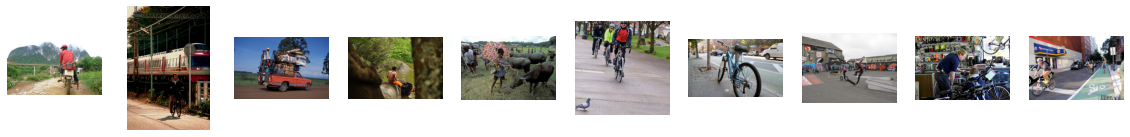

In [17]:
columns = 10
plt.figure(figsize=(20, 5))
for i, idx in enumerate(nearest_neighbors[0]):
    img_id = img_map[idx]
    url = coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)
    
    plt.subplot(int(len(nearest_neighbors[0]) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(raw_img)

***

In [9]:
raw_img.size

(640, 397)

In [5]:
coco.imgs

{391895: {'license': 3,
  'file_name': 'COCO_val2014_000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895},
 522418: {'license': 4,
  'file_name': 'COCO_val2014_000000522418.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 11:38:44',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'id': 522418},
 184613: {'license': 3,
  'file_name': 'COCO_val2014_000000184613.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000184613.jpg',
  'height': 336,
  'width': 500,
  'date_captured': '2013-11-14 12:36:29',
  'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
  'id': 184613},
 318219: {'

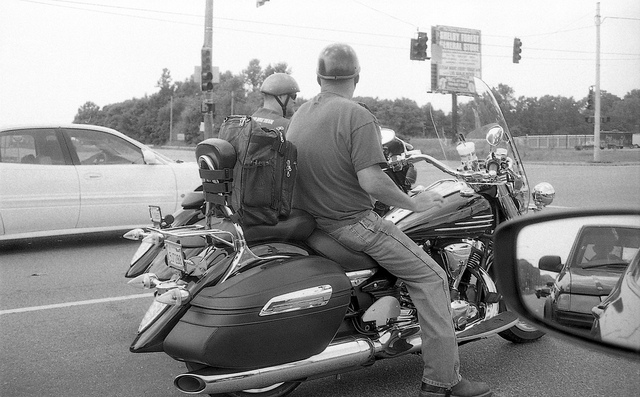

In [5]:
url = coco.imgs[559665]['coco_url']
raw_img = Image.open(requests.get(url, stream=True).raw)
raw_img

In [6]:
img_feat = ImageFeature(url).get_vector()

In [18]:
test = neigh.fit(img_feats)

In [19]:
test.kneighbors(img_feats, return_distance=False)

array([[ 0, 14, 22, 27,  2, 33, 31, 32,  4, 10],
       [ 1, 29,  9,  6, 16, 28, 15, 18, 21, 26],
       [ 2, 27,  0, 33, 22,  4, 14,  3, 32, 13],
       [ 3,  4, 26,  5,  6, 19,  7,  9, 29, 10],
       [ 4,  3, 26,  5, 19,  7, 29, 23,  9,  6],
       [ 5,  6, 10,  9, 18, 12, 29, 13, 11, 16],
       [ 6, 29,  5,  9, 18, 17, 12,  8, 16, 13],
       [ 7, 17,  3,  4, 10, 28,  5,  6,  9, 30],
       [ 8, 12, 13,  9, 29, 18,  6, 21, 10, 16],
       [ 9, 10,  8,  5,  6, 29, 18,  1, 13, 28],
       [10,  9,  5, 13,  8, 21, 29,  6, 28, 15],
       [11,  5, 18, 16, 10, 29,  9,  6,  1, 12],
       [12, 16,  8, 18,  6, 29, 20,  5, 13, 21],
       [13,  8, 29,  6,  9, 10,  5, 18, 21, 12],
       [14, 33,  0, 31, 32, 22, 13,  2, 19,  3],
       [15, 21, 16, 29,  8,  1,  9, 13,  6, 18],
       [16, 29, 12, 18, 21,  6, 15, 28,  5,  8],
       [17,  6,  7, 28, 29,  9,  1, 21, 13,  5],
       [18, 29, 16, 12,  6,  9,  8,  5, 13, 11],
       [19, 33, 31,  4,  3, 32, 14, 22, 26, 13],
       [20, 12,  8, 